### import the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#### load the dataset

In [2]:
df = pd.read_csv("IMDB Dataset.csv")

In [3]:
# displaying the top 5 rows
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
# displaying the first row of review column
df["review"][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [5]:
df.shape

(50000, 2)

In [6]:
# getting info from the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [7]:
# Encoding
df["sentiment"].replace({"positive": 1 , "negative": 0}, inplace=True)

In [8]:
df.sample(3)

,review,sentiment
30787,"On the positive, I'll say it's pretty enough t...",0
37614,"For some reason, some shows just fail...some d...",1
2871,"Unfortunately for me, the first Busby Berkeley...",0


## Data pre-processing

In [9]:
def processing(text):
    text= text.lower()
    text = re.sub('<br />', '', text)
    text = re.sub(r"https\S+|www\S+|http\S+", '', text, flags = re.MULTILINE)
    text = re.sub(r'\@w+|\#', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text_tokens = word_tokenize(text)
    swords = set(stopwords.words('english'))
    filter_text = [i for i in text_tokens if not i in swords]
    return " ".join(filter_text)

In [10]:
df.review = df["review"].apply(processing)

In [11]:
df["review"][0]

'one reviewers mentioned watching 1 oz episode youll hooked right exactly happened methe first thing struck oz brutality unflinching scenes violence set right word go trust show faint hearted timid show pulls punches regards drugs sex violence hardcore classic use wordit called oz nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda em city home manyaryans muslims gangstas latinos christians italians irish moreso scuffles death stares dodgy dealings shady agreements never far awayi would say main appeal show due fact goes shows wouldnt dare forget pretty pictures painted mainstream audiences forget charm forget romanceoz doesnt mess around first episode ever saw struck nasty surreal couldnt say ready watched developed taste oz got accustomed high levels graphic violence violence injustice crooked guards wholl sold nickel inmates wholl kill order get away well mannered middle 

### Stemming

In [12]:
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [13]:
df.review = df['review'].apply(lambda x: stemming(x))

In [14]:
df["review"][0]

'one reviewers mentioned watching 1 oz episode youll hooked right exactly happened methe first thing struck oz brutality unflinching scenes violence set right word go trust show faint hearted timid show pulls punches regards drugs sex violence hardcore classic use wordit called oz nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda em city home manyaryans muslims gangstas latinos christians italians irish moreso scuffles death stares dodgy dealings shady agreements never far awayi would say main appeal show due fact goes shows wouldnt dare forget pretty pictures painted mainstream audiences forget charm forget romanceoz doesnt mess around first episode ever saw struck nasty surreal couldnt say ready watched developed taste oz got accustomed high levels graphic violence violence injustice crooked guards wholl sold nickel inmates wholl kill order get away well mannered middle 

### checking duplicates in the dataset

In [15]:
df.duplicated().sum()

422

#### droping duplicates

In [16]:
df.drop_duplicates("review",inplace = True)

In [17]:
df.shape

(49578, 2)

## data visualization

<AxesSubplot:xlabel='sentiment', ylabel='count'>

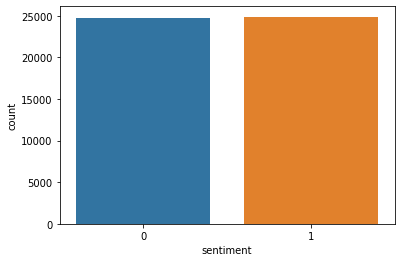

In [18]:
sns.countplot(data=df , x="sentiment")

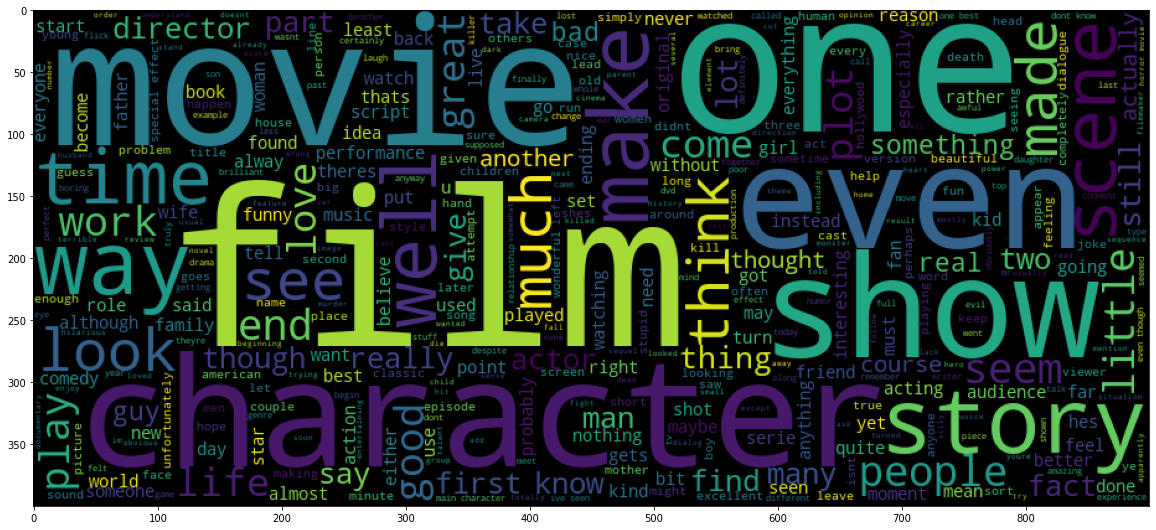

In [19]:
text = "".join([word for word in df["review"]])
plt.figure(figsize=(20,15), facecolor='None')
wordCloud = WordCloud(width=900 ,height=400 , max_words=400).generate(text)
plt.imshow(wordCloud)

## Splitting dataset

In [20]:
x = df["review"]
y = df["sentiment"]

In [21]:
vect = TfidfVectorizer()

In [22]:
x = vect.fit_transform(df['review'])

In [23]:
x_train,x_test , y_train , y_test = train_test_split(x , y , test_size=0.3)

In [24]:
x_train.shape

(34704, 221707)

In [25]:
x_test.shape

(14874, 221707)

In [26]:
y_train.shape

(34704,)

In [27]:
y_test.shape

(14874,)

## Model building

### Logistic Regression

In [28]:
log = LogisticRegression()
log.fit(x_train , y_train)
log_pred = log.predict(x_test)

In [29]:
log_acc = accuracy_score(log_pred, y_test)

In [30]:
print(log_acc)

0.891152346376227


In [39]:
print(confusion_matrix(y_test , log_pred))

[[6472  906]
 [ 713 6783]]


In [40]:
print(classification_report(y_test , log_pred))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      7378
           1       0.88      0.90      0.89      7496

    accuracy                           0.89     14874
   macro avg       0.89      0.89      0.89     14874
weighted avg       0.89      0.89      0.89     14874



### DecisionTreeClassifier

In [32]:
dt = DecisionTreeClassifier()
dt.fit(x_train , y_train)
dt_pred = dt.predict(x_test)

In [33]:
dt_acc = accuracy_score(dt_pred , y_test)

In [41]:
dt_acc

0.7152077450584913

In [42]:
print(confusion_matrix(y_test , dt_pred))

[[5257 2121]
 [2115 5381]]


In [43]:
print(classification_report(y_test , dt_pred))

              precision    recall  f1-score   support

           0       0.71      0.71      0.71      7378
           1       0.72      0.72      0.72      7496

    accuracy                           0.72     14874
   macro avg       0.72      0.72      0.72     14874
weighted avg       0.72      0.72      0.72     14874



### RandomForestClassifier

In [ ]:
rf = RandomForestClassifier()
rf.fit(x_train , y_train)
rf_pred = rf.predict(x_test)

In [36]:
rf_acc = accuracy_score(rf_pred , y_test)

In [38]:
rf_acc

0.8504101116041415

In [44]:
print(confusion_matrix(y_test , rf_pred))

[[6275 1103]
 [1122 6374]]


In [45]:
print(classification_report(y_test , rf_pred))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      7378
           1       0.85      0.85      0.85      7496

    accuracy                           0.85     14874
   macro avg       0.85      0.85      0.85     14874
weighted avg       0.85      0.85      0.85     14874



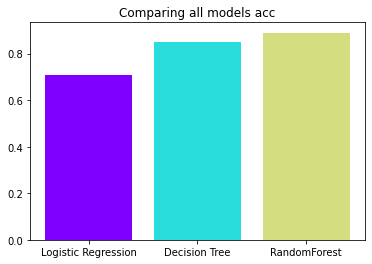

In [53]:
acc = np.array([0.89 , 0.71, 0.85 ])
labels = np.array(["Logistic Regression" , "Decision Tree" , "RandomForest"])
index = np.argsort(acc)
color = plt.cm.rainbow(np.linspace(0, 1, 4))

plt.bar(range(len(index)) , acc[index], color = color )
plt.xticks(range(0,3),["Logistic Regression" , "Decision Tree" , "RandomForest"])
plt.title("Comparing all models acc")
plt.show()

 - Hence the Randomforest have the best accuracy